# Кластеризация

## Ручные задачи

## Задача 1

Жокей Святополк решил открыть несколько новых ларьков с шаурмой. Перед открытием он
подумал о потенциальных покупателях и выяснил, где на районе находятся общежития. На картинках ниже они отмечены синими точками. Святополк понимает, что все общежития, расположенные в районе, можно сегментировать по их географическому положению и, исходя из этого,
расположить палатки с шаурмой. Сделать это ему хотелось бы с помощью алгоритма K−means:
- 1. Ставим ларьки с шаурмой в случайных местах;
- 2. Смотрим в какой кому ближе идти;
- 3. Двигаем ларьки ближе к центрам их популярности;
- 4. Снова смотрим и двигаем;
- 5. Повторяем так много раз, пока алгоритм не сойдётся и движение не прекратится.


Красными точками отмечены стартовые точки для палаток. В первом районе Святополк ставит две палатки, во втором районе три палатки. Помогите Святополку с сегментацией! Сколько
итераций понадобилось сделать до полной сходимости алгоритма? Сколько объектов вошли в
каждый из кластеров?

Используйте манхеттенское расстояние

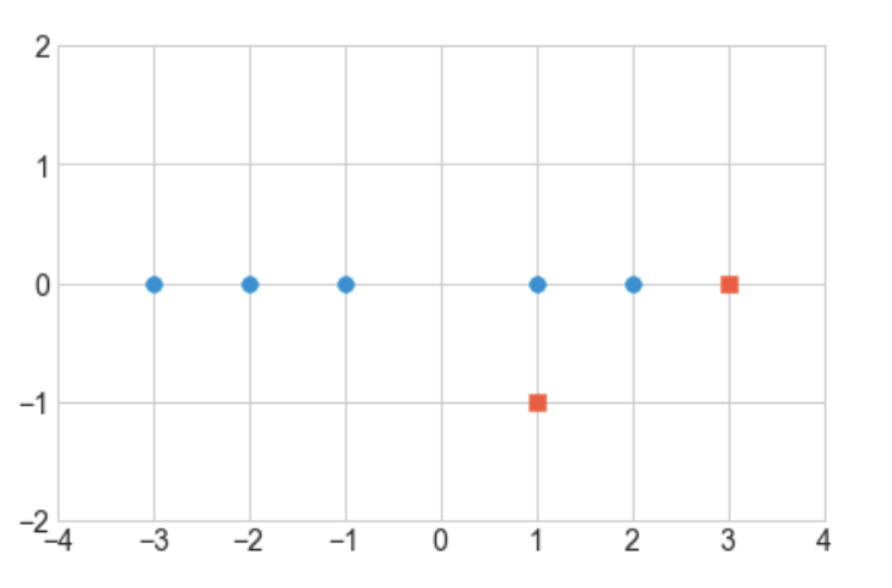

## Задача 2

Начальник Аристарх был в командировке. Там он услышал про иерархическую агломеративную кластеризацию. По приезду, находясь в состоянии восторга, он записал в свой блокнот
следующие четыре наблюдения:

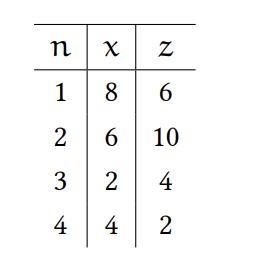

После он отдал блокнот маркетологу Савелию. Аристарх хочет, чтобы Савелий провел агломеративную иерархическую кластеризацию. На совещаний было решено использовать в качестве расстояния между объектами обычное Евклидово расстояние. Расстояние между кластерами
решено определять по принципу дальнего соседа. Помогите Савелию с агломеративной иерархической кластеризацией. И не забудьте нарисовать дендрограмму.

## Кодововые задачи: кластеризация городов

Изучать кластеризацию удобно на географических данных (координатах каких-либо объектов), потому что такие объекты имеют два признака (удобно визуализировать) и часто образуют кластеры. Мы будем использовать набор коодинат российских населенных пунктов.

Ссылка на данные:

In [ ]:
data_link = "https://raw.githubusercontent.com/nadiinchi/HSE_minor_DataAnalysis_seminars_iad16/master/materials/sem_b3_coord.csv"

In [ ]:
import pandas 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
data = pandas.read_csv(data_link)

In [ ]:
data.head()

Визуализируем точки:

In [ ]:
plt.figure(figsize= (30,10))
plt.scatter(data['LONG'], data['LAT'])

Картина напоминает очертания России :) Слева - Калининградская область. Разумеется, расстояния искажаются, потому что мы отображаем точки в декартовой системе координат, а не на сфере. Этот же эффект будет иметь место при кластеризации.

Наиболее популярный метод кластеризации - k-means. Принцип его работы крайне прост. Мы по очереди выполняем два шага: поиск центра каждого кластера по точкам, которые ему принадлежат, и определение кластера для каждой точки. Реализуем k-means самостоятельно: напишем класс с методами fit и transform, по аналогии с интерфейсом sklearn.

In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
class k_means:
    def __init__(self, n_clusters):
        # гиперпараметр - количество кластеров
        self.n_clusters = n_clusters
        
    def fit(self, X, max_iter=10, visualize=False):
        """
        X - выборка размера количество объектов x количество признаков
        max_iter - максимальное число итераций
        visualize - визуализировать точки ("карту") на каждой итерации 
        """
        
        # Цель: обучить центры кластеров self.centers, форма: число кластеров x число признаков
    
        # Шаг 0: сколько объектов и признаков?
        num_obj = 
        num_feat = 
        
        # Шаг 1.1: инициализируйте y - вектор длины число объектов, 
        # хранящий, к какому кластеру относится каждый объект
        # каждый элемент - случайно выбранный номер кластера (используйте np.random.randint)
        y = 
        
        # Шаг 1.2: создайте матрицу для хранения центров кластеров (используйте np.zeros)
        self.centers = 
        
        for _ in range(max_iter):
            # Шаг 2: обновите центры кластеров (используйте цикл по номерам кластеров, индексацию, np.mean)
            
            
            # Шаг 3: обновите y. Для этого вычислите расстояния между всеми объектами 
            # и центрами кластеров (используйте pairwise_distances), 
            # затем найдите ближайший к каждому объекту кластер (используйте np.argmin с указанием axis)
           
            
            # Поддержка флага visualize
                plt.figure(figsize= (30,10))
                plt.scatter(X[:, 1], X[:, 0], c=y)
                plt.show()
    
    def transform(self, X):
        """
        X - выборка размера количество объектов x количество признаков
        """
        # Цель: вернуть y - номера кластеров, к которым относится каждый объект
        # вектор длины число объектов в X
        
        # return ... - не забудьте вернуть y!

In [ ]:
cls = k_means(10)
cls.fit(data.values, visualize=True) # visualize=True выводит график на каждой итерации
y = cls.transform(data.values)

Итоговая кластеризация:

In [ ]:
plt.figure(figsize= (30,10))
plt.scatter(data['LONG'], data['LAT'], c=y)

Мы реализовали k-Means - самый популярный алгоритм кластеризации. Попробуем использовать другой популярный алгоритм кластеризации - DBSCAN. Этот метод основывается на совсем других принципах - он оценивает плотность в каждой точке и группирует точки в кластеры на основе того, в плотной или не плотной области они находятся. Если k-Means может находить только выпуклые кластеры (выделить кластеры-дольки k-Means не может с математической точки зрения), то DBSCAN хорошо работает на данных с изогнутыми кластерами. DBSCAN также допускает существование шумовых точек, не относящихся ни к какому кластеру - в результате эти шумовые точки не "портят" найденные кластеры.

Примените DBSCAN к нашим данным городов. Используйте реализацию из sklearn, для начала установите гиперпараметры по умолчанию. DBSCAN поддерживает интерфейс fit_predict.

In [ ]:
from sklearn.cluster import DBSCAN
# student's code here



DBSCAN сам определяет число кластеров по данным, однако требует указания двух других гиперпараметров: eps - радиус окрестности, по которой определяется плотность точек вокруг данной точки, и min_samples - число объектов рядом с точкой, необходимое для того, чтобы вокруг точки образовался кластер. Как видите, если менять значения этих гиперпараметров, понятие кластера и их число будет тоже меняться. Попробуйте разные значения этих двух гиперпараметров, найдите лучшую с визуальной точки зрения комбинацию. Используйте лог-шкалы (1, 2, 4, 8, 16...)!

In [ ]:
# student's code here


### Кластеризация пикселей

Скачайте [картинку](https://raw.githubusercontent.com/iad34/seminars/master/materials/apple.png)

Применим наш метод кластеризации к сегментации изображений. Для этого загрузим картинку и будем каждый ее пиксель рассматривать как отдельный объект с тремя признаками R G B, отвечающими за цвет пикселя. Нам понадобится изменить форму тензора с изображением, вытянув все пиксели вдоль одной оси, чтобы получить матрицу объекты-признаки.

In [ ]:
img = plt.imread("apple.png")
img.shape

In [ ]:
plt.imshow(img)

In [ ]:
X = img.reshape(-1, 3)
cls = k_means(3)
cls.fit(X)
y = cls.transform(X)
plt.imshow(y.reshape(img.shape[:2]))

Обратите внимание, что при кластеризации никак не учитывалась информация о положении пикселя на изображении, а учитывался только цвет.

__Опциональное задание__: добавьте к трем уже использующимся признакам (RGB) признаки-координаты пикселя. Можно поэкспериментировать с метриками (например, домножать признаки-координаты на какой-то вес-гиперпараметр).

### Кластеризация цифр

Кластеризуйте изображения цифр. В этом задании, в отличие от предыдущего, одна картинка - это один объект (в предыдущем задании один пиксель - один объект).

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

In [ ]:
digits = digits["data"]

Число объектов и признаков:

In [ ]:
digits.shape

In [ ]:
# Каждый объект - изображение цифры размеров 8 x 8
plt.imshow(digits[0].reshape(8, 8), cmap="gray")

Задание:
1. Кластеризуйте цифры обоими методами кластеризации. 
1. Для k-means визуализируйте картинки - центры кластеров.
1. Для DBSCAN выведите случайно выбранные 3 картинки из каждого кластера.
1. Визуализации можно использовать как меру качества кластеризации при выборе гиперпараметров.